In [9]:
import pandas as pd
from urllib.parse import urlparse
import matplotlib.pyplot as plt


In [4]:
# Load the benign URLs
df = pd.read_csv("benign_dataframe_0.csv")  # assume column name is 'url'

In [5]:
df.sample(3)

,id,url,html
38,0080551f-0e5e-409b-81a2-4bfb9de182e8,https://goldprice.org/,PGh0bWwgbGFuZz0iZW4iIGRpcj0ibHRyIiBwcmVmaXg9Im...
623,07e043ef-6dd8-454c-abd1-338191dc6431,https://www.orange.ro/,PGh0bWwgbGFuZz0icm8iPjxoZWFkPjxtZXRhIGNoYXJzZX...
854,0af1460e-7e82-475f-8ef3-fd07a872c355,https://mtnews24.com/,PGh0bWwgbGFuZz0iZW4iPjxoZWFkPjxtZXRhIGh0dHAtZX...


In [6]:
df.shape

(1000, 3)

In [3]:

# Define a simple mirror of your JS logic
def is_phishing_url(url):
    try:
        parsed = urlparse(url)
        hostname = parsed.hostname or ""
        tld = hostname.split('.')[-1]
        score = 0

        # Subdomain length
        parts = hostname.split('.')
        subdomain = '.'.join(parts[:-2]) if len(parts) >= 3 else ''
        if len(subdomain) > 5:
            score += 0.2

        # Free hosting
        if any(fh in hostname for fh in ["weebly", "netlify", "000webhost", "github"]):
            score += 0.3

        # Hyphens
        if hostname.count('-') >= 1:
            score += 0.1

        # Suspicious TLDs
        if tld in ["tk", "ml", "ga", "cf", "gq"]:
            score += 0.2

        # Phishing keywords
        if any(k in url.lower() for k in ["login", "verify", "account", "secure"]):
            score += 0.2

        return min(score, 1.0)
    except:
        return 0.0  # be safe if parsing fails

Avg score: 0.021
Number flagged as phishing: 0


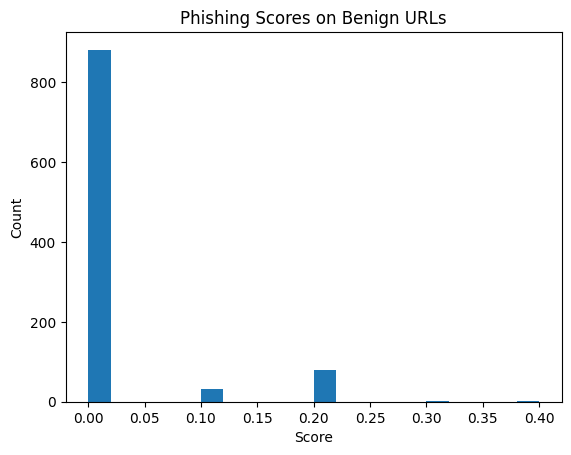

In [10]:
# Run it
df['phishing_score'] = df['url'].apply(is_phishing_url)

# Analyze false positives
print("Avg score:", df['phishing_score'].mean())
print("Number flagged as phishing:", (df['phishing_score'] > 0.7).sum())

# Optional: Plot histogram
plt.hist(df['phishing_score'], bins=20)
plt.title("Phishing Scores on Benign URLs")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()